In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [2]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
import os
import shutil
from pathlib import Path

# Input dataset root (contains multiple class folders)
source_root = Path("/kaggle/input/urban-issues-dataset")

# Output YOLO dataset root
output_root = Path("/kaggle/working/dataset")
splits = ["train", "valid", "test"]

# Create YOLO folders
for split in splits:
    (output_root / "images" / split).mkdir(parents=True, exist_ok=True)
    (output_root / "labels" / split).mkdir(parents=True, exist_ok=True)

# Loop through each class folder
for class_folder in source_root.iterdir():
    if class_folder.is_dir():
        for split in splits:
            img_dir = class_folder / class_folder.name / split / "images"
            label_dir = class_folder / class_folder.name / split / "labels"

            if not img_dir.exists() or not label_dir.exists():
                continue  # skip if split doesn't exist for this class

            for img_file in img_dir.glob("*.*"):
                src_label_path = label_dir / f"{img_file.stem}.txt"

                # If label file doesn't exist, skip
                if not src_label_path.exists():
                    continue

                # Check if label file contains invalid lines (> 5 elements)
                remove_file = False
                with open(src_label_path, "r") as f:
                    for line in f:
                        parts = line.strip().split()
                        if len(parts) > 5:
                            remove_file = True
                            break

                if remove_file:
                    continue  # Skip copying invalid files

                # Copy valid image
                dest_img_path = output_root / "images" / split / f"{class_folder.name}_{img_file.name}"
                shutil.copy(img_file, dest_img_path)

                # Copy valid label
                dest_label_path = output_root / "labels" / split / f"{class_folder.name}_{img_file.stem}.txt"
                shutil.copy(src_label_path, dest_label_path)

print("YOLO dataset ready at:", output_root)

YOLO dataset ready at: /kaggle/working/dataset


In [4]:
# import shutil
# import os

# output_dir = "/kaggle/working"

# # Delete everything inside the directory
# for filename in os.listdir(output_dir):
#     file_path = os.path.join(output_dir, filename)
#     try:
#         if os.path.isfile(file_path) or os.path.islink(file_path):
#             os.unlink(file_path)  # remove file
#         elif os.path.isdir(file_path):
#             shutil.rmtree(file_path)  # remove foldear
#     except Exception as e:
#         print(f"Failed to delete {file_path}. Reason: {e}")

# print("/kaggle/working cleared")

In [5]:
# Use the model
results = model.train(data="/kaggle/input/urban-issues-dataset/config.yaml", epochs=50)  # train the model

Ultralytics 8.3.177 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/urban-issues-dataset/config.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, p

Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1211.3±657.9 MB/s, size: 76.7 KB)


train: Scanning /kaggle/working/dataset/labels/train... 25075 images, 354 backgrounds, 0 corrupt: 100%|██████████| 25075/25075 [00:20<00:00, 1252.61it/s]

train: /kaggle/working/dataset/images/train/Garbage_Datacluster Trash (236).jpg: corrupt JPEG restored and saved
train: /kaggle/working/dataset/images/train/Garbage_Datacluster Trash (237).jpg: corrupt JPEG restored and saved
train: /kaggle/working/dataset/images/train/Garbage_Datacluster Trash (239).jpg: corrupt JPEG restored and saved
train: /kaggle/working/dataset/images/train/Garbage_Datacluster Trash (240).jpg: corrupt JPEG restored and saved
train: /kaggle/working/dataset/images/train/IllegalParking_30717230707_cc09c3e457_b_jpg.rf.1d5a1334fabe41fd6f5f19a2d25ac002.jpg: 1 duplicate labels removed
train: /kaggle/working/dataset/images/train/IllegalParking_30717230707_cc09c3e457_b_jpg.rf.65c3ceebe756b8b3ab49c0987e78d404.jpg: 2 duplicate labels removed
train: /kaggle/working/dataset/images/train/IllegalParking_392C51FF00000578-0-image-a-11_1475781587245_jpg.rf.40a8bda830db6d5dba20687d03b78dc6.jpg: 1 duplicate labels removed
train: /kaggle/working/dataset/images/train/IllegalParking_39

train: New cache created: /kaggle/working/dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 646.7±373.2 MB/s, size: 70.4 KB)


val: Scanning /kaggle/working/dataset/labels/valid... 3279 images, 63 backgrounds, 0 corrupt: 100%|██████████| 3279/3279 [00:02<00:00, 1425.21it/s]

val: New cache created: /kaggle/working/dataset/labels/valid.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.44G        3.3      4.578      3.953         17        640: 100%|██████████| 1568/1568 [04:31<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:21<00:00,  4.72it/s]


                   all       3279       6155      0.576     0.0512    0.00838    0.00199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.71G      2.219      3.557      2.708          9        640: 100%|██████████| 1568/1568 [04:25<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.29it/s]


                   all       3279       6155      0.545        0.1     0.0801     0.0361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.73G      1.951      3.045      2.324          9        640: 100%|██████████| 1568/1568 [04:23<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.20it/s]


                   all       3279       6155      0.357        0.2      0.118     0.0522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.74G      1.847      2.814      2.165          7        640: 100%|██████████| 1568/1568 [04:22<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:18<00:00,  5.50it/s]


                   all       3279       6155      0.533      0.194      0.148     0.0726

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.76G       1.77      2.639       2.06          5        640: 100%|██████████| 1568/1568 [04:23<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.31it/s]


                   all       3279       6155      0.553      0.216      0.183     0.0956

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.77G      1.725      2.504      2.005         27        640: 100%|██████████| 1568/1568 [04:23<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.31it/s]


                   all       3279       6155       0.53      0.225      0.197     0.0927

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.78G      1.683      2.407      1.956         15        640: 100%|██████████| 1568/1568 [04:20<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.34it/s]


                   all       3279       6155      0.481      0.294      0.262      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.79G      1.644       2.31      1.912         18        640: 100%|██████████| 1568/1568 [04:20<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:18<00:00,  5.43it/s]


                   all       3279       6155      0.471      0.274      0.259      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       2.8G      1.623      2.257       1.89          9        640: 100%|██████████| 1568/1568 [04:20<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.38it/s]


                   all       3279       6155      0.388      0.305      0.284      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.81G      1.603      2.202      1.864          6        640: 100%|██████████| 1568/1568 [04:19<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.28it/s]


                   all       3279       6155      0.464      0.337      0.298      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.99G      1.583      2.167      1.841          9        640: 100%|██████████| 1568/1568 [04:20<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.40it/s]


                   all       3279       6155      0.545      0.315      0.314      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         3G      1.565      2.112      1.822         12        640: 100%|██████████| 1568/1568 [04:23<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.30it/s]


                   all       3279       6155      0.536      0.336       0.34      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.01G      1.555      2.084      1.813          5        640: 100%|██████████| 1568/1568 [04:22<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.40it/s]


                   all       3279       6155       0.53       0.34      0.337      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.02G      1.536      2.046      1.798         11        640: 100%|██████████| 1568/1568 [04:24<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.23it/s]


                   all       3279       6155      0.472      0.364      0.347      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.04G      1.528      2.024      1.787          5        640: 100%|██████████| 1568/1568 [04:27<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.27it/s]


                   all       3279       6155      0.523       0.36      0.358      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.04G      1.518      1.989      1.772          9        640: 100%|██████████| 1568/1568 [04:26<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:18<00:00,  5.43it/s]


                   all       3279       6155       0.54      0.369      0.369      0.199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.06G        1.5      1.959      1.762         23        640: 100%|██████████| 1568/1568 [04:23<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.41it/s]


                   all       3279       6155      0.548      0.382      0.377      0.208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.07G      1.492      1.941      1.753          5        640: 100%|██████████| 1568/1568 [04:25<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.35it/s]


                   all       3279       6155      0.533      0.384      0.384      0.207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.08G       1.49      1.922      1.744         11        640: 100%|██████████| 1568/1568 [04:25<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.24it/s]


                   all       3279       6155       0.53      0.416      0.405      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.09G      1.486      1.903      1.742         14        640: 100%|██████████| 1568/1568 [04:22<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.25it/s]


                   all       3279       6155      0.538      0.401      0.393      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.27G      1.475      1.884      1.731         11        640: 100%|██████████| 1568/1568 [04:24<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.17it/s]


                   all       3279       6155      0.576       0.41      0.412      0.225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.28G      1.461      1.863      1.722          4        640: 100%|██████████| 1568/1568 [04:29<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:20<00:00,  5.08it/s]


                   all       3279       6155      0.561      0.412      0.414      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.47G      1.461       1.84      1.716         23        640: 100%|██████████| 1568/1568 [04:30<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:20<00:00,  5.12it/s]


                   all       3279       6155      0.596      0.418      0.424      0.238

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.49G      1.447       1.82      1.708          9        640: 100%|██████████| 1568/1568 [04:28<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.15it/s]


                   all       3279       6155      0.553      0.428      0.426      0.238

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       3.5G      1.443      1.808      1.702         30        640: 100%|██████████| 1568/1568 [04:26<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.24it/s]


                   all       3279       6155      0.597      0.416      0.433      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.51G      1.437      1.789      1.696         13        640: 100%|██████████| 1568/1568 [04:24<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:18<00:00,  5.47it/s]


                   all       3279       6155      0.612      0.424      0.442      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.52G      1.437      1.776      1.691          9        640: 100%|██████████| 1568/1568 [04:25<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.38it/s]


                   all       3279       6155      0.613      0.426      0.447      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.53G      1.427      1.779      1.686         11        640: 100%|██████████| 1568/1568 [04:28<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:20<00:00,  5.12it/s]


                   all       3279       6155      0.586      0.432      0.448      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.54G      1.416      1.752      1.683          7        640: 100%|██████████| 1568/1568 [04:25<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.24it/s]


                   all       3279       6155      0.592      0.435      0.448      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.55G       1.42      1.737       1.67         21        640: 100%|██████████| 1568/1568 [04:26<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:18<00:00,  5.52it/s]


                   all       3279       6155      0.616      0.429      0.451      0.257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.56G      1.406      1.711      1.664         21        640: 100%|██████████| 1568/1568 [04:25<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:18<00:00,  5.53it/s]


                   all       3279       6155       0.62      0.435      0.455      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.58G      1.404      1.705       1.66         16        640: 100%|██████████| 1568/1568 [04:24<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.39it/s]


                   all       3279       6155      0.622      0.439      0.466      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.59G        1.4        1.7       1.66          6        640: 100%|██████████| 1568/1568 [04:25<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:18<00:00,  5.42it/s]


                   all       3279       6155      0.624      0.435      0.467      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       3.6G      1.389      1.673      1.648         29        640: 100%|██████████| 1568/1568 [04:26<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:18<00:00,  5.44it/s]


                   all       3279       6155      0.622       0.45      0.469      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.61G      1.388      1.674      1.647         15        640: 100%|██████████| 1568/1568 [04:27<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:20<00:00,  5.12it/s]


                   all       3279       6155      0.608       0.45      0.468      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.62G      1.381      1.656      1.641         13        640: 100%|██████████| 1568/1568 [04:26<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.16it/s]


                   all       3279       6155      0.501      0.457      0.474      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.63G      1.378      1.643      1.638          8        640: 100%|██████████| 1568/1568 [04:27<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.38it/s]


                   all       3279       6155      0.521       0.45      0.478      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.64G      1.379      1.638      1.636          8        640: 100%|██████████| 1568/1568 [04:29<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:18<00:00,  5.57it/s]


                   all       3279       6155      0.533      0.449      0.481      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.66G       1.36      1.608      1.623         11        640: 100%|██████████| 1568/1568 [04:28<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:18<00:00,  5.47it/s]


                   all       3279       6155      0.537      0.453      0.484       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.67G      1.361      1.606       1.62          5        640: 100%|██████████| 1568/1568 [04:27<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:18<00:00,  5.53it/s]


                   all       3279       6155      0.537      0.453      0.486      0.281
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.68G      1.446      1.555      1.726          7        640: 100%|██████████| 1568/1568 [04:25<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.41it/s]


                   all       3279       6155      0.538      0.451       0.49      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.69G      1.426      1.515      1.711          3        640: 100%|██████████| 1568/1568 [04:26<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.39it/s]


                   all       3279       6155      0.541      0.456      0.491      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       3.7G      1.414      1.492      1.701          4        640: 100%|██████████| 1568/1568 [04:29<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:18<00:00,  5.44it/s]


                   all       3279       6155      0.575       0.46      0.492      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.71G      1.409      1.469      1.692          7        640: 100%|██████████| 1568/1568 [04:21<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.42it/s]


                   all       3279       6155      0.575       0.47      0.494      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.72G      1.397      1.456      1.685          6        640: 100%|██████████| 1568/1568 [04:23<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:20<00:00,  4.99it/s]


                   all       3279       6155      0.572      0.473      0.497      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.74G      1.394      1.436      1.683          4        640: 100%|██████████| 1568/1568 [04:24<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:20<00:00,  4.96it/s]


                   all       3279       6155      0.565      0.475      0.499       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.75G      1.374       1.41      1.666          3        640: 100%|██████████| 1568/1568 [04:23<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:20<00:00,  4.97it/s]


                   all       3279       6155      0.571      0.475        0.5      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.76G      1.378      1.403      1.664          4        640: 100%|██████████| 1568/1568 [04:20<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:18<00:00,  5.47it/s]


                   all       3279       6155      0.569      0.474        0.5      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.77G      1.363      1.389      1.656          5        640: 100%|██████████| 1568/1568 [04:23<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:18<00:00,  5.51it/s]


                   all       3279       6155      0.574      0.474      0.503      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.78G      1.357      1.376       1.65          4        640: 100%|██████████| 1568/1568 [04:25<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:18<00:00,  5.47it/s]


                   all       3279       6155      0.578      0.472      0.505      0.295

50 epochs completed in 3.961 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.177 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:20<00:00,  4.95it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       3279       6155      0.579      0.472      0.504      0.294
   Damaged Road issues        727       1338      0.619      0.306      0.395      0.186
        Pothole Issues        570       1818      0.628       0.39      0.465      0.203
Illegal Parking Issues         24         38      0.227     0.0263     0.0498    0.00785
Broken Road Sign Issues         41         41      0.677      0.878      0.856       0.62
          Fallen trees        982       1237      0.752      0.548      0.648      0.329
Littering/Garbage on Public Places        660       1175      0.664      0.554      0.616      0.403
      Vandalism Issues        208        393      0.552      0.573      0.581      0.391
 Dead Animal Pollution         25         25      0.488       0.52      0.428      0.235
Damaged Electric wires and poles         81         90      0.598      0.456        0.5      0.274
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 1.3ms postprocess per image
Resul


image 1/1 /kaggle/input/urban-issues-dataset/Potholes and RoadCracks/Potholes and RoadCracks/test/images/181_jpg.rf.8d1f5e11badb48443564cc4de81e5520.jpg: 640x640 2 Pothole Issuess, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


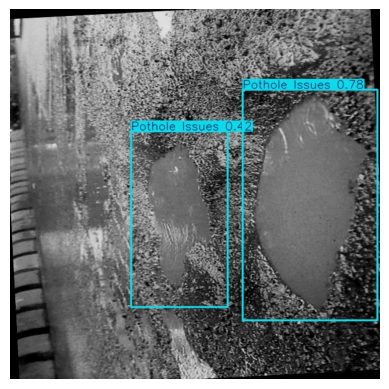

In [6]:
from ultralytics import YOLO
import cv2

# Load model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Run inference
results = model('/kaggle/input/urban-issues-dataset/Potholes and RoadCracks/Potholes and RoadCracks/test/images/181_jpg.rf.8d1f5e11badb48443564cc4de81e5520.jpg')

# Save results with bounding boxes to a folder
results[0].save(filename='/kaggle/working/output1.jpg')

# Display the saved image (only works in Kaggle Notebook output)
img = cv2.imread('/kaggle/working/output1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.show()


image 1/1 /kaggle/input/urban-issues-dataset/Damaged concrete structures/Damaged concrete structures/test/images/dacl10k_v2_train_0026_jpg.rf.8a413dd3b08b6809284a35ad6bbd55c7.jpg: 640x640 1 Vandalism Issues, 7.4ms
Speed: 2.3ms preprocess, 7.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


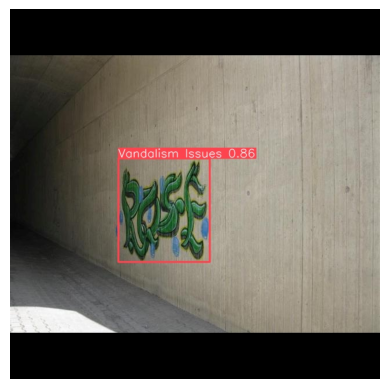

In [7]:
from ultralytics import YOLO
import cv2

# Load model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Run inference
results = model('/kaggle/input/urban-issues-dataset/Damaged concrete structures/Damaged concrete structures/test/images/dacl10k_v2_train_0026_jpg.rf.8a413dd3b08b6809284a35ad6bbd55c7.jpg')

# Save results with bounding boxes to a folder
results[0].save(filename='/kaggle/working/output2.jpg')

# Display the saved image (only works in Kaggle Notebook output)
img = cv2.imread('/kaggle/working/output2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.show()


image 1/1 /kaggle/input/urban-issues-dataset/FallenTrees/FallenTrees/test/images/295_jpg.rf.a96c9f64bbff9db66e3eeee3318be04c.jpg: 640x640 1 Fallen trees, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


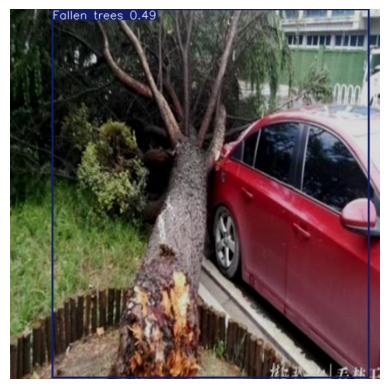

In [8]:
from ultralytics import YOLO
import cv2

# Load model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Run inference
results = model('/kaggle/input/urban-issues-dataset/FallenTrees/FallenTrees/test/images/295_jpg.rf.a96c9f64bbff9db66e3eeee3318be04c.jpg')

# Save results with bounding boxes to a folder
results[0].save(filename='/kaggle/working/output3.jpg')

# Display the saved image (only works in Kaggle Notebook output)
img = cv2.imread('/kaggle/working/output3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.show()